In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

master = "master.csv"

data = pd.read_csv(master,sep=",",decimal=",")

In [65]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [60]:
data = data[data.year != 2016]

In [61]:
del data['HDI for year']

In [62]:
df = data.loc[:, 'year':'generation']
df = df.drop(['country-year'], axis=1)

df = df.dropna()

# Transformando datos a valores numéricos

from sklearn import preprocessing

def convertCol(df_value):
    df_value=df_value.replace(",", "")
    df_value=float(df_value)
    return df_value

def alterandoSequencia(df_value):
  if df_value==4:
    df_value=0 #5-14 years
  elif df_value==0:
    df_value=1 #15-24 year
  elif df_value==3:
    df_value=2 #25-34 years
  elif df_value==1:
    df_value=3 #35-54 years
  elif df_value==5:
    df_value=4 #55-74 years
  elif df_value==2:
    df_value=5 #75+ years

  return df_value


df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].apply(convertCol)

le = preprocessing.LabelEncoder()

le.fit(df['sex'])
df['sex']=le.transform(df['sex'])

le.fit(df['generation'])
df['generation']=le.transform(df['generation'])

le.fit(df['age'])
df['age']=le.transform(df['age'])

df['age']=df['age'].apply(alterandoSequencia)

In [63]:
columns = df.columns

In [64]:
print(df.head())

   year  sex  age  suicides_no  population suicides/100k pop  \
0  1987    1    1           21      312900              6.71   
1  1987    1    5           16      308000              5.19   
2  1987    0    1           14      289700              4.83   
3  1987    1    4            1       21800              4.59   
4  1987    1    3            9      274300              3.28   

    gdp_for_year ($)   gdp_per_capita ($)  generation  
0        2.156625e+09                 796           2  
1        2.156625e+09                 796           5  
2        2.156625e+09                 796           2  
3        2.156625e+09                 796           1  
4        2.156625e+09                 796           0  


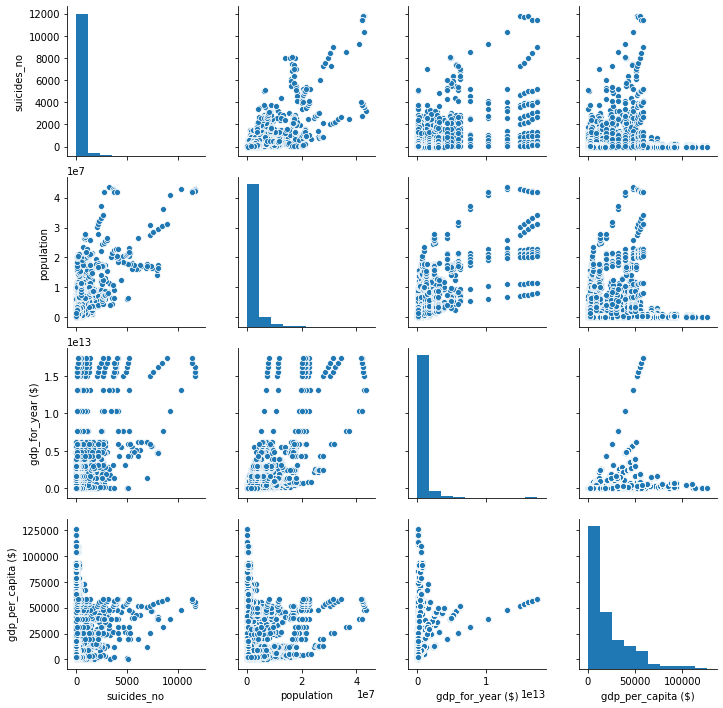

In [5]:
# Distribuciones 

df_new = df[['suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]

sns.pairplot(df_new, kind="scatter")
plt.show()

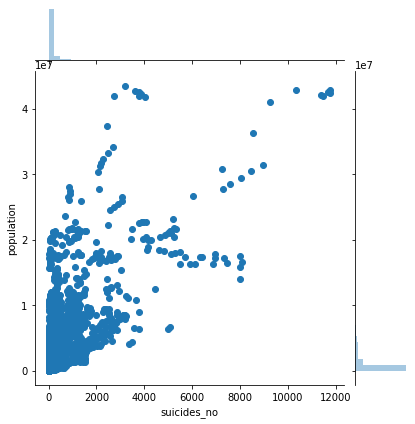

In [6]:
sns.jointplot(x=df["suicides_no"], y=df["population"], data=df);

In [ ]:
# Clustering

# Ejecución del método del codo para identificar el número óptimo de grupos para el algoritmo K-Means

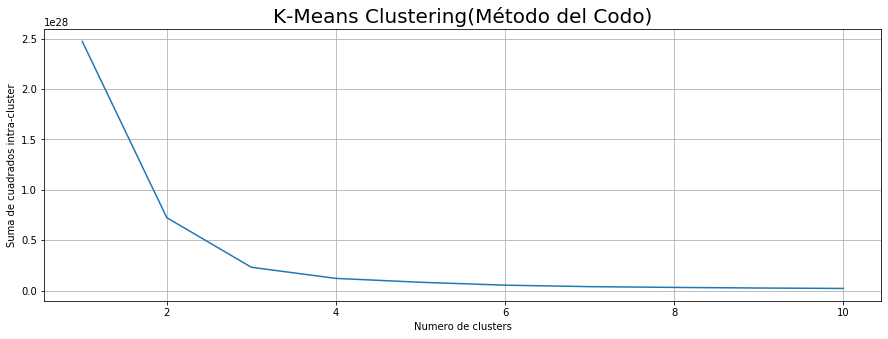

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(Método del Codo)', fontsize = 20)
plt.xlabel('Numero de clusters')
plt.ylabel('Suma de cuadrados intra-cluster')
plt.grid()
plt.show()

In [26]:
# Clúster utilizando el algoritmo K-Means con el número de agrupación establecido en 3 
# según el análisis del método de codo

In [8]:
from sklearn.cluster import MiniBatchKMeans

In [27]:
# Ejecución del algoritmo MiniBatchKMeans

In [9]:
kmeans = MiniBatchKMeans(n_clusters=3,
                          random_state=0,
                          batch_size=10)

In [10]:
y_pred = kmeans.fit_predict(df)

Text(0, 0.5, 'Número de suicídios')

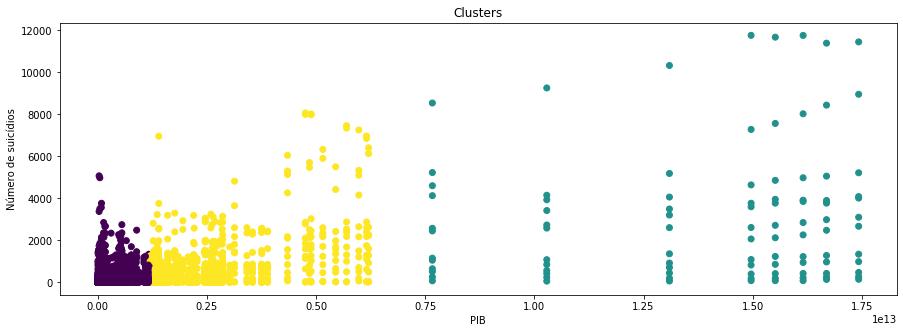

In [11]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=y_pred)
plt.title("Clusters")
plt.xlabel("PIB")
plt.ylabel("Número de suicídios")

In [12]:
from sklearn.cluster import AffinityPropagation

In [28]:
# Clustering usando el algoritmo de propagación de afinidad

In [13]:
clustering = AffinityPropagation().fit(df)

In [14]:
AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [15]:
y_pred = clustering.predict(df)

Text(0, 0.5, 'Número de suicídios')

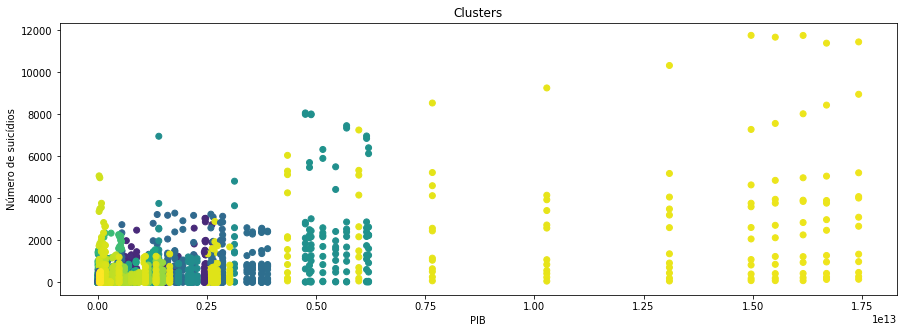

In [16]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=y_pred)
plt.title("Clusters")
plt.xlabel("PIB")
plt.ylabel("Número de suicídios")

In [29]:
# Clustering utilizando el algoritmo aglomerativo

In [18]:
preds = []
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    y_pred = clustering.fit_predict(df)
    preds.append(y_pred)

Text(0, 0.5, 'Número de suicídios')

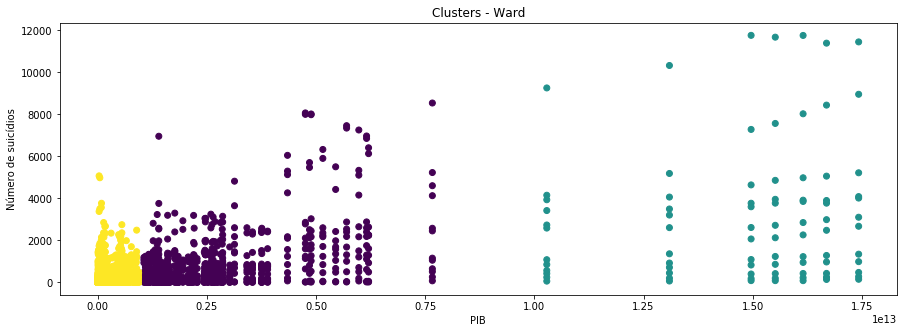

In [20]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=preds[0])
plt.title("Clusters - Ward")
plt.xlabel("PIB")
plt.ylabel("Número de suicídios")

Text(0, 0.5, 'Número de suicídios')

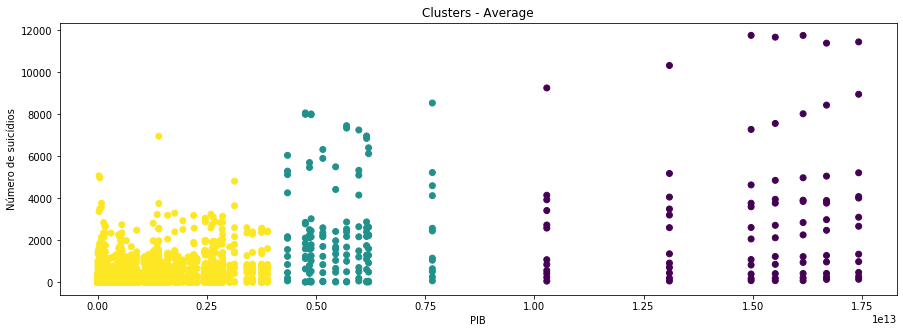

In [21]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=preds[1])
plt.title("Clusters - Average")
plt.xlabel("PIB")
plt.ylabel("Número de suicídios")

Text(0, 0.5, 'Número de suicídios')

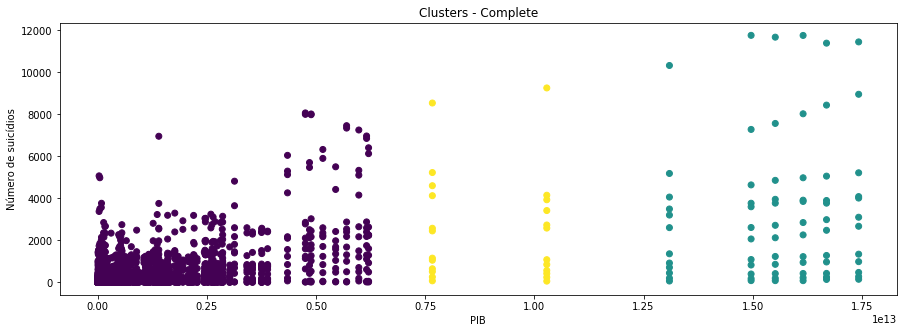

In [22]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=preds[2])
plt.title("Clusters - Complete")
plt.xlabel("PIB")
plt.ylabel("Número de suicídios")

Text(0.5, 1.0, 'Clusters - Single')

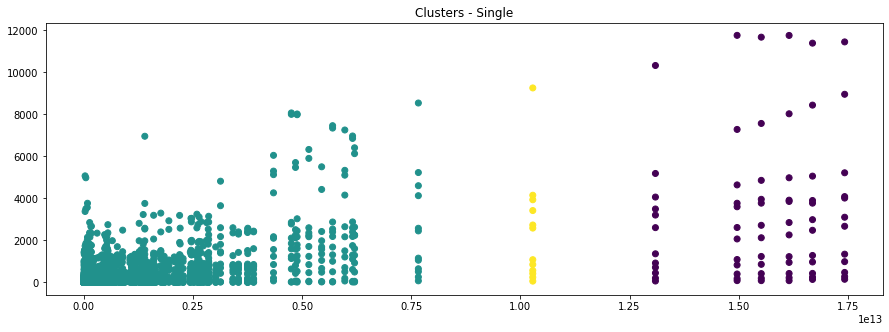

In [23]:
plt.scatter(df[" gdp_for_year ($) "],df["suicides_no"], c=preds[3])
plt.title("Clusters - Single")